In [14]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib import cm
import ast
import pickle
import matplotlib
import h5py
from matplotlib import ticker

In [6]:
file = open("C:/Users/vkuma/Research/1000 2757.3104802197818 1845.5910891980886variables.pkl", "rb")
variables = pickle.load(file)
file = open("C:/Users/vkuma/Research/1000 2757.3104802197818 1845.5910891980886data.pkl", "rb")
data = pickle.load(file)
file = "C:/Users/vkuma/Research/1000(2757.3104802197818 1845.5910891980886).h5"
f = h5py.File(file, 'r')
dVect= f['samples'][()]
pVect = f['prob'][()]

27573.104802197817

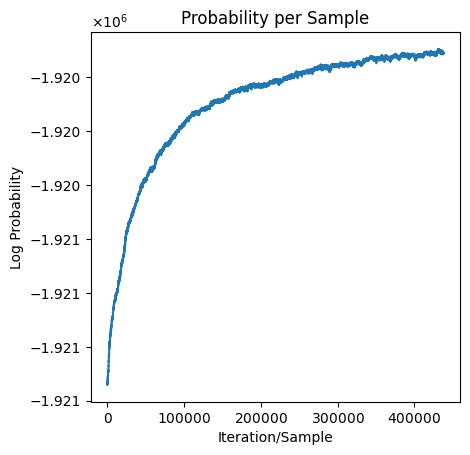

In [13]:
#generate plot
fig, ax = plt.subplots(1, 1)
plt.plot(pVect[10000:])
plt.title("Probability per Sample")
plt.xlabel("Iteration/Sample")
plt.ylabel("Log Probability")
plt.ticklabel_format(useMathText=True)
from matplotlib import ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter)
class ScalarFormatterClass(ticker.ScalarFormatter):
   def _set_format(self):
      self.format = "%1.3f"
yScalarFormatter = ScalarFormatterClass(useMathText=True)
yScalarFormatter.set_powerlimits((0,0))
ax.yaxis.set_major_formatter(yScalarFormatter)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

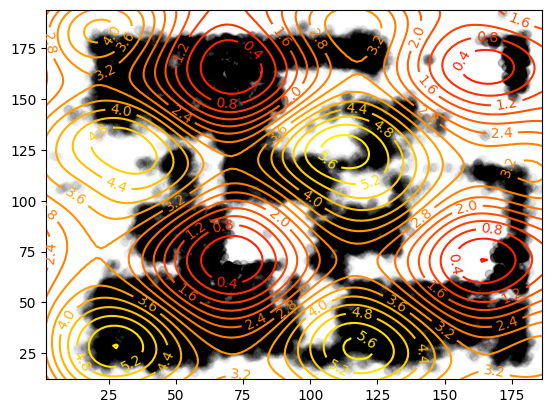

In [24]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = cInduFine.T @ cInduInduInv @ np.mean(dVect, 0)

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.figure()
mapPlot = plt.contour(shapedX/100, shapedY/100, shapedMap/10000, levels = 15, cmap = cm.autumn)
plt.clabel(mapPlot, inline=1, fontsize=10)
plt.scatter(trajectories[:,0]/100, trajectories[:,1]/100, alpha = 0.01, c = "black")

In [21]:
def diffusion(x, y):
    value = 6e4 + 30000*np.sin(x/1500) + 30000*np.sin(y/1500)
    return np.abs(value/2)


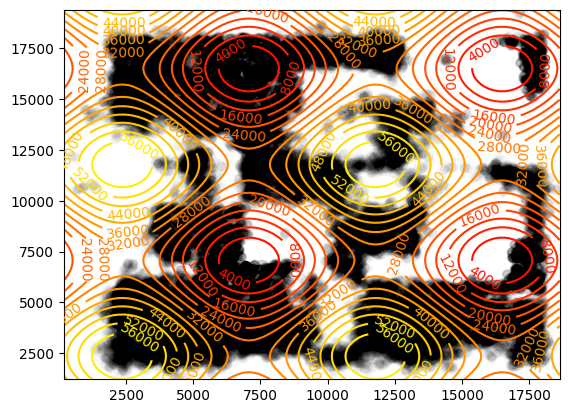

In [23]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = diffusion(fineCoordinates[:,0], fineCoordinates[:,1])

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.figure()
mapPlot = plt.contour(shapedX, shapedY, shapedMap, levels = 15, cmap = cm.autumn)
plt.clabel(mapPlot, inline=1, fontsize=10)
plt.scatter(trajectories[:,0], trajectories[:,1], alpha = 0.01, c = "black")

C:\Users\vkuma\AppData\Local\Temp\ipykernel_10496\1263837977.py:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(m, shrink = 0.5, anchor = (0.5, 0.5))


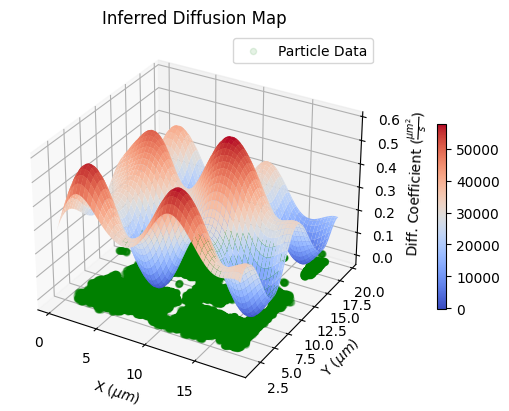

In [32]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories
induCoordinates = variables.induCoordinates 

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples
unshapedMap = (cInduFine.T @ (cInduInduInv @ np.mean(dVect[100000:], 0)))

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)




#generate contour plot
fig = plt.axes(projection='3d')
fig.plot_surface(shapedX/1000, shapedY/1000, shapedMap/100000, cmap=cm.coolwarm)
fig.scatter3D(trajectories[:,0]/1000, trajectories[:,1]/1000, 0, color = "green", alpha = 0.1, label = "Particle Data")
#fig.scatter3D(induCoordinates[:,0], induCoordinates[:,1], 0, color = "black", alpha = 0.5, label = "Inducing Points")
fig.set_xlabel(r"X ($\mu m$)")
fig.set_ylabel(r"Y ($\mu m$)")
fig.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
fig.set_title("Inferred Diffusion Map")
#ticks = np.arange(0, 10/100, 2/100)
fig.legend()
#fig.set_zticks(ticks)
norm = matplotlib.colors.Normalize(vmin=np.min(shapedMap), vmax=np.max(shapedMap))
m = cm.ScalarMappable(cmap=cm.coolwarm, norm=norm)
m.set_array([])
plt.colorbar(m, shrink = 0.5, anchor = (0.5, 0.5))

Text(0.5, 0.92, 'Ground Truth Diffusion Map')

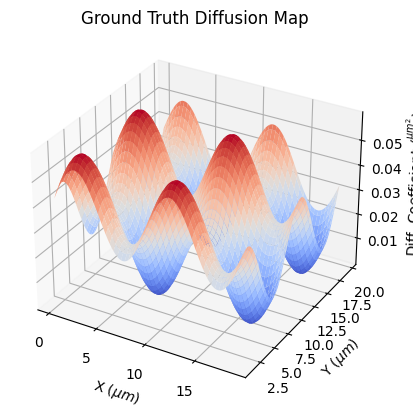

In [57]:
#necassary variables
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#shape for plot
shape = (nFineX, nFineY)

#take mean of all samples

unshapedMap = diffusion(fineCoordinates[:, 0], fineCoordinates[:, 1])

#reshape variables to make plotting easy
shapedMap = np.reshape(unshapedMap, shape)/1000
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)

#generate contour plot
fig = plt.axes(projection='3d')
fig.plot_surface(shapedX/1000, shapedY/1000, shapedMap/1000, cmap=cm.coolwarm)
fig.set_xlabel(r"X ($\mu m$)")
fig.set_ylabel(r"Y ($\mu m$)")
fig.set_zlabel(r"Diff. Coefficient ($\frac{\mu m^2}{s}$)")
fig.set_title("Ground Truth Diffusion Map")
#ticks = np.arange(0, 2/10, 5/100)
#fig.set_zticks(ticks)

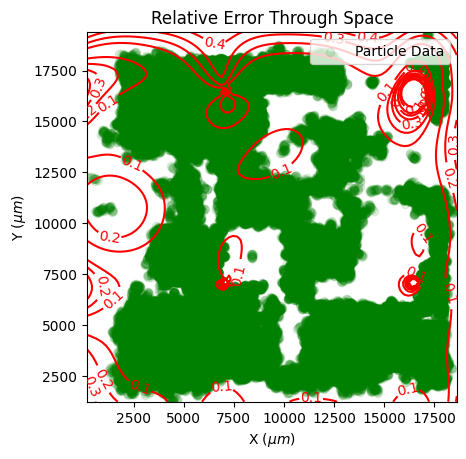

In [56]:
from cProfile import label


nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

groundTruth = diffusion(fineCoordinates[:, 0], fineCoordinates[:, 1])
shape = (nFineX, nFineY)

unshapedMap = cInduFine.T @ cInduInduInv @ np.mean(dVect[50000:], 0)

shapedGroundTruth = np.reshape(groundTruth, shape)
shapedMap = np.reshape(unshapedMap, shape)
shapedX = np.reshape(fineCoordinates[:,0], shape)
shapedY = np.reshape(fineCoordinates[:,1], shape)
diff = (np.abs((shapedGroundTruth - shapedMap))/shapedGroundTruth)
fig, ax = plt.subplots(1, 1)

mapPlot = plt.contour(shapedX, shapedY, diff, colors = 'r', levels = [.1, .2, .3, .4, .5, .6, .8, 1.0])
plt.xlabel(r"X ($\mu m$)")
plt.ylabel(r"Y ($\mu m$)")
plt.title('Relative Error Through Space')
plt.scatter(trajectories[:,0], trajectories[:,1], color = "green", alpha = 0.1, label = "Particle Data")
plt.legend()
plt.clabel(mapPlot, inline=2, fontsize=10)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

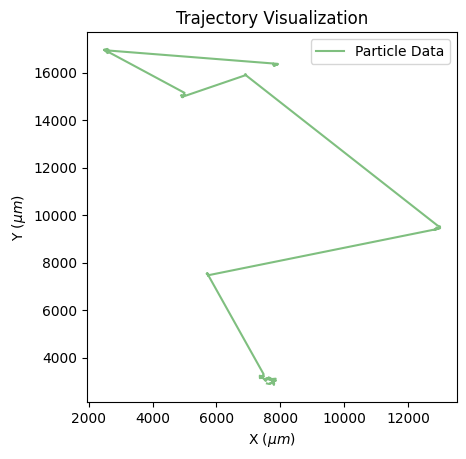

In [54]:
nFineX = variables.nFineX
nFineY = variables.nFineY
cInduFine = variables.cInduFine
cInduInduInv = variables.cInduInduInv
fineCoordinates = variables.fineCoordinates
trajectories = data.trajectories

#groundTruth = diffusion(fineCoordinates.T)
#shape = (nFineX, nFineY)

#unshapedMap = cInduFine.T @ (cInduInduInv @ np.mean(dVect, 0))

#shapedGroundTruth = np.reshape(groundTruth, shape)
#shapedMap = np.reshape(unshapedMap, shape)
#shapedX = np.reshape(fineCoordinates[:,0], shape)
#shapedY = np.reshape(fineCoordinates[:,1], shape)
#diff = (np.abs((shapedGroundTruth - shapedMap))/shapedGroundTruth)
fig, ax = plt.subplots(1, 1)

plt.xlabel(r"X ($\mu m$)")
plt.ylabel(r"Y ($\mu m$)")
plt.title('Trajectory Visualization')
#fig.set_zlabel('Diffusion Coefficient(UNITS)')
#induCoordinates = variables.induCoordinates 
plt.plot(trajectories[:142,0], trajectories[:142,1], color = "green", alpha = 0.5, label = "Particle Data")
#plt.scatter(induCoordinates[:,0], induCoordinates[:,1], color = "black", alpha = 0.5, label = "Inducing Points")
#plt.clabel(mapPlot, inline=2, fontsize=10)
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.legend()